In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
cell_df =  pd.read_csv("cell_samples.csv")
cell_df.head()
cell_df.tail()
cell_df.shape
cell_df.size
cell_df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [51]:
cell_df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


<Axes: xlabel='Clump', ylabel='UnifSize'>

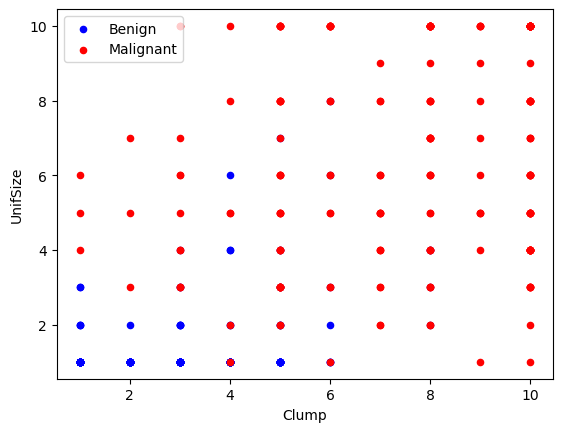

In [39]:
benign_df= cell_df[cell_df['Class']==2][0:200]
malignant_df= cell_df[cell_df['Class']==4][0:200]
#help(benign.plot)
graph = benign_df.plot(kind='scatter',x='Clump',y='UnifSize',color='blue',label='Benign')
malignant_df.plot(kind='scatter',x='Clump',y='UnifSize',color='red',label='Malignant',ax = graph)

In [43]:
cell_df=cell_df[pd.to_numeric(cell_df['BareNuc'],errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [44]:
cell_df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [45]:
feature_df = cell_df[[ 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
Y = np.asarray(cell_df['Class'])
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [46]:
Y[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)
X_train.shape
#(546,9)
Y_train.shape#(546)
X_test.shape#(137,9)
Y_test.shape#(137)

(137,)

In [49]:
from sklearn import svm
classifier = svm.SVC(kernel='linear', gamma = 'auto',C=2)
classifier.fit(X_train,Y_train)
y_predict = classifier.predict(X_test)

In [50]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

